In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Загрузка данных и обработка признаков 

In [2]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)


columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Цвет', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']


df = df[columns_needed + target + ['product_id', 'name']]
df[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df['memory2'] = df["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df['memory3'] = df["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df['memory4'] = df["name"].apply(lambda x: get_memory_from_name(x))
df['memory'] = df.apply(choose, axis=1)

df = df.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df['height1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df['width1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df['depth1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df['height2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df['width2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df['depth2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df['height'] = df.apply(choose_h, axis=1)
df['width'] = df.apply(choose_w, axis=1)
df['depth'] = df.apply(choose_d, axis=1)

df = df.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df['video_resolution_v'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df['video_resolution_h'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df['screen_resolution_h'] = df["Разрешение экрана"].apply(lambda x: get_res_0(x))
df['screen_resolution_v'] = df["Разрешение экрана"].apply(lambda x: get_res_1(x))

df['screen_diag'] = df["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df = df.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df['dust_IP'] = df["Степень защиты"].apply(lambda x: get_dust_IP(x))
df['water_IP'] = df["Степень защиты"].apply(lambda x: get_water_IP(x))

df = df.drop(columns=["Степень защиты"])

df['zoom'] = df['Цифровой зум (x)']
df['weight'] = df['Вес (г)']
df['kernel_cnt'] = df['Количество ядер']
df['screen_technology'] = df['Технология экрана']
df['power'] = df['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df['frame_has_metal'] = df['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df['frame_has_plastic'] = df['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df = df.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [3]:
df['is_new'] = df['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1)
df = df.drop(columns=['Состояние'])

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

df['standarts'] = df['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
df['battery'] = df.apply(fill_iphone_capacity, axis=1)
mean_battery = df['Емкость аккумулятора (мАч)'].mean()

df['is_5G'] = df['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
df['is_5G'] = df['is_5G'].astype(int)

df['frameless'] = (df['Безрамочный'] == 'Да').astype(int)


def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

df['year'] = np.where(df['Год релиза'] != 2028, df['Год релиза'], 2023)
df['year'] = df['year'].apply(lambda x: get_year(x))

df = df.rename(columns={'Количество основных камер (шт)' : 'main_cams'})

In [4]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)
df[['Съемка видео в портретном режиме','Оптическая стабилизация']] = df[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

df['camera_mp_parsed'] = df['Основная камера МПикс'].apply(parse_camera)
df['front_camera'] = df['Фронтальная камера МПикс'].apply(parse_camera)


df['opt_zoom'] = df['Оптический зум на увеличение (x)']
df = df.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме', 'Емкость аккумулятора (мАч)'])
df['front_camera_mp_total'] = df['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
df['main_camera_mp_total'] = df['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

df = df.drop(columns=['front_camera', 'camera_mp_parsed'])

In [5]:
df['brand_Apple'] = (df['brand'] == 'Apple').astype(int)
df['brand_Samsung'] = (df['brand'] == 'Samsung').astype(int)
df['brand_Xiaomi'] = (df['brand'] == 'Xiaomi').astype(int)
df['brand_Tecno'] = (df['brand'] == 'Tecno').astype(int)
df['brand_HONOR'] = (df['brand'] == 'HONOR').astype(int)
df['brand_HUAWEI'] = (df['brand'] == 'HUAWEI').astype(int)
df['brand_Infinix'] = (df['brand'] == 'Infinix').astype(int)
df['strong_frame'] = df['frame_has_metal'] - df['frame_has_plastic']
df = df.drop(columns=['frame_has_metal', 'frame_has_plastic'])

df = df.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Цвет',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power'])

Мини проверки после предобработки 

In [6]:
import numpy as np
import pandas as pd

TARGET = "salePrice"

# 0.1) Проверим, что таргет есть и числовой
assert TARGET in df.columns
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")

# 0.2) Уберем строки без таргета и с неадекватными ценами
df = df.dropna(subset=[TARGET]).copy()
df = df[df[TARGET] > 0].copy()

# 0.3) Проверим типы признаков: SVR требует числовые
X_raw = df.drop(columns=[TARGET])
non_numeric = X_raw.columns[X_raw.dtypes == "object"].tolist()
print("Object columns:", non_numeric)

# если вдруг остались object-колонки — их надо закодировать/почистить
# (в вашем пайплайне их, по идее, уже быть не должно)

Object columns: []


Трейн-тест сплит + лог таргет 

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].astype(float).copy()

# Лог-таргет (рекомендую, для цены почти всегда лучше)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(743, 30) (186, 30)


In [9]:
# Сколько пропусков в целом
nan_rate = X.isna().mean().sort_values(ascending=False)
print(nan_rate.head(15))

# Сколько строк имеют хотя бы один NaN
print("Rows with any NaN:", X.isna().any(axis=1).sum(), "out of", len(X))

zoom                     0.312164
depth                    0.286329
height                   0.285253
width                    0.285253
weight                   0.282024
screen_diag              0.032293
dust_IP                  0.026911
battery                  0.004306
main_camera_mp_total     0.002153
front_camera_mp_total    0.002153
brand_Tecno              0.000000
opt_zoom                 0.000000
brand_HONOR              0.000000
brand_Xiaomi             0.000000
brand_HUAWEI             0.000000
dtype: float64
Rows with any NaN: 570 out of 929


Модель 1: SVR

SVR: пайплайн + RepeatedKFold + подбор гиперпараметров

In [10]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

svr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

param_dist = {
    "svr__C": np.logspace(1, 4, 30),
    "svr__gamma": np.logspace(-5, -1, 30),
    "svr__epsilon": [0.01, 0.05, 0.1, 0.2, 0.5]
}

search = RandomizedSearchCV(
    estimator=svr_pipe,
    param_distributions=param_dist,
    n_iter=60,
    scoring="neg_mean_absolute_error",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score="raise"   # чтобы сразу видеть реальные ошибки
)

search.fit(X_train, y_train)
svr_best = search.best_estimator_

print("Best params:", search.best_params_)
print("Best CV score (neg MAE on log target):", search.best_score_)

Fitting 15 folds for each of 60 candidates, totalling 900 fits
Best params: {'svr__gamma': 0.014873521072935119, 'svr__epsilon': 0.01, 'svr__C': 221.22162910704503}
Best CV score (neg MAE on log target): -0.08143301186377339


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_on_test(model, X_test, y_test_log):
    pred_log = model.predict(X_test)
    y_true = np.expm1(y_test_log)
    y_pred = np.expm1(pred_log)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse, mae, r2 = evaluate_on_test(svr_best, X_test, y_test)
print(f"SVR TEST: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

SVR TEST: RMSE=11,458 | MAE=4,221 | R2=0.9530


In [12]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm = permutation_importance(
    svr_best,
    X_test,     # именно DataFrame с 30 исходными колонками
    y_test,
    scoring="neg_mean_absolute_error",
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

imp_df.head(20)

,feature,importance_mean,importance_std
15,battery,0.223788,0.016949
2,height,0.203896,0.012414
3,width,0.146628,0.010934
4,depth,0.133001,0.009447
21,main_camera_mp_total,0.131018,0.014110
7,screen_resolution_h,0.099184,0.010008
1,memory,0.097296,0.007894
8,screen_resolution_v,0.094228,0.008279
16,is_5G,0.089994,0.007923
23,brand_Samsung,0.085323,0.007877


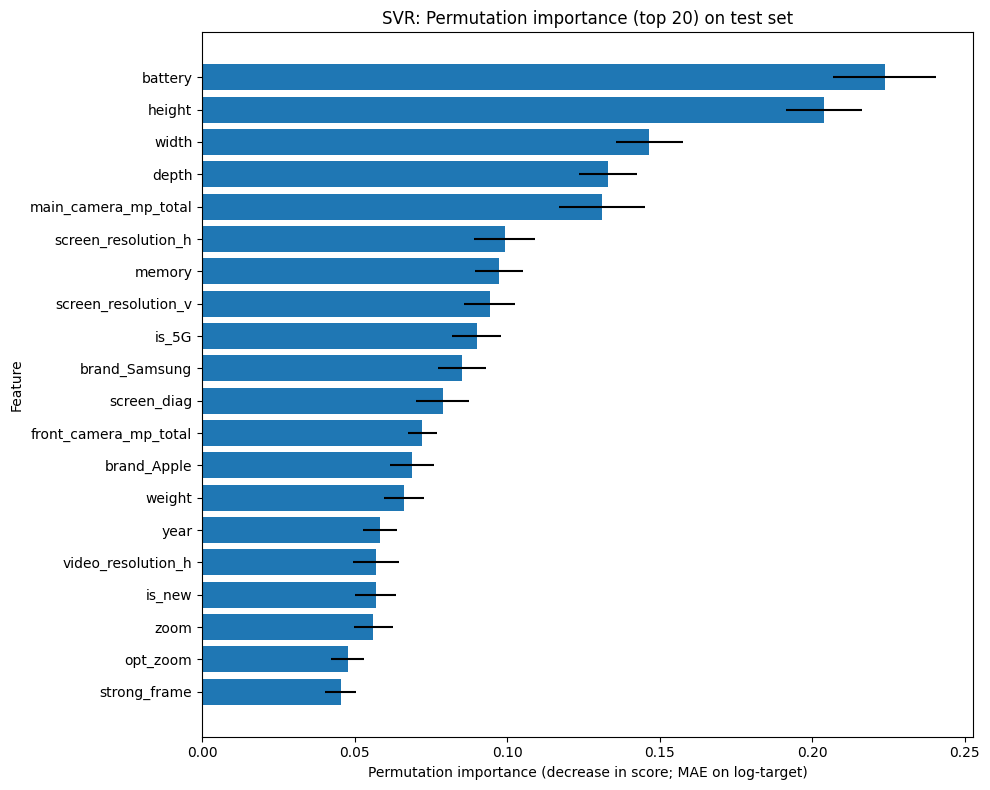

In [13]:
import matplotlib.pyplot as plt

top_k = 20
plot_df = imp_df.head(top_k).iloc[::-1]  # перевернем для красивого графика

plt.figure(figsize=(10, 8))
plt.barh(plot_df["feature"], plot_df["importance_mean"], xerr=plot_df["importance_std"])
plt.xlabel("Permutation importance (decrease in score; MAE on log-target)")
plt.ylabel("Feature")
plt.title(f"SVR: Permutation importance (top {top_k}) on test set")
plt.tight_layout()
plt.show()

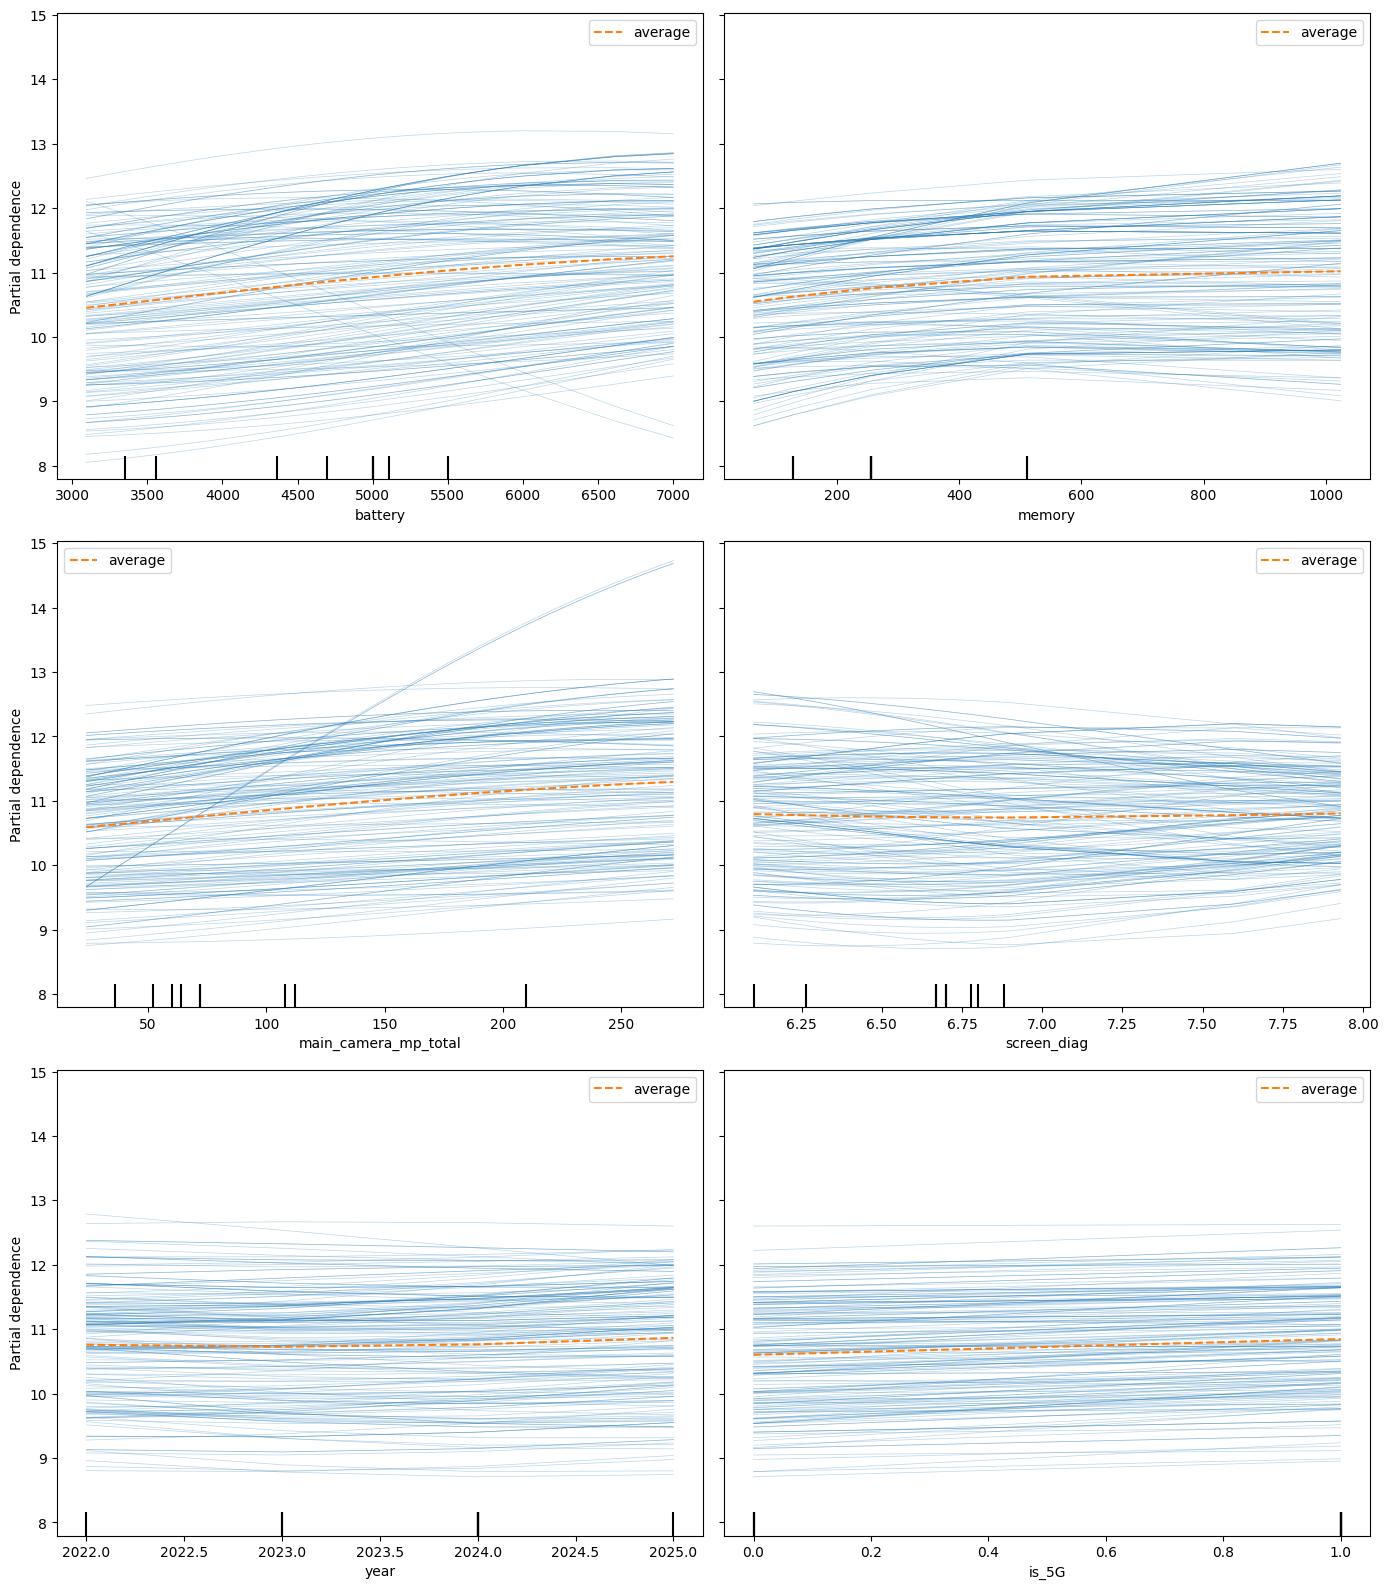

In [14]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_for_pdp = ["battery", "memory", "main_camera_mp_total",
                    "screen_diag", "year", "is_5G"]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

PartialDependenceDisplay.from_estimator(
    svr_best,
    X_test,
    features=features_for_pdp,
    kind="both",          # PDP + ICE
    grid_resolution=40,
    ax=ax
)

plt.tight_layout()
plt.show()

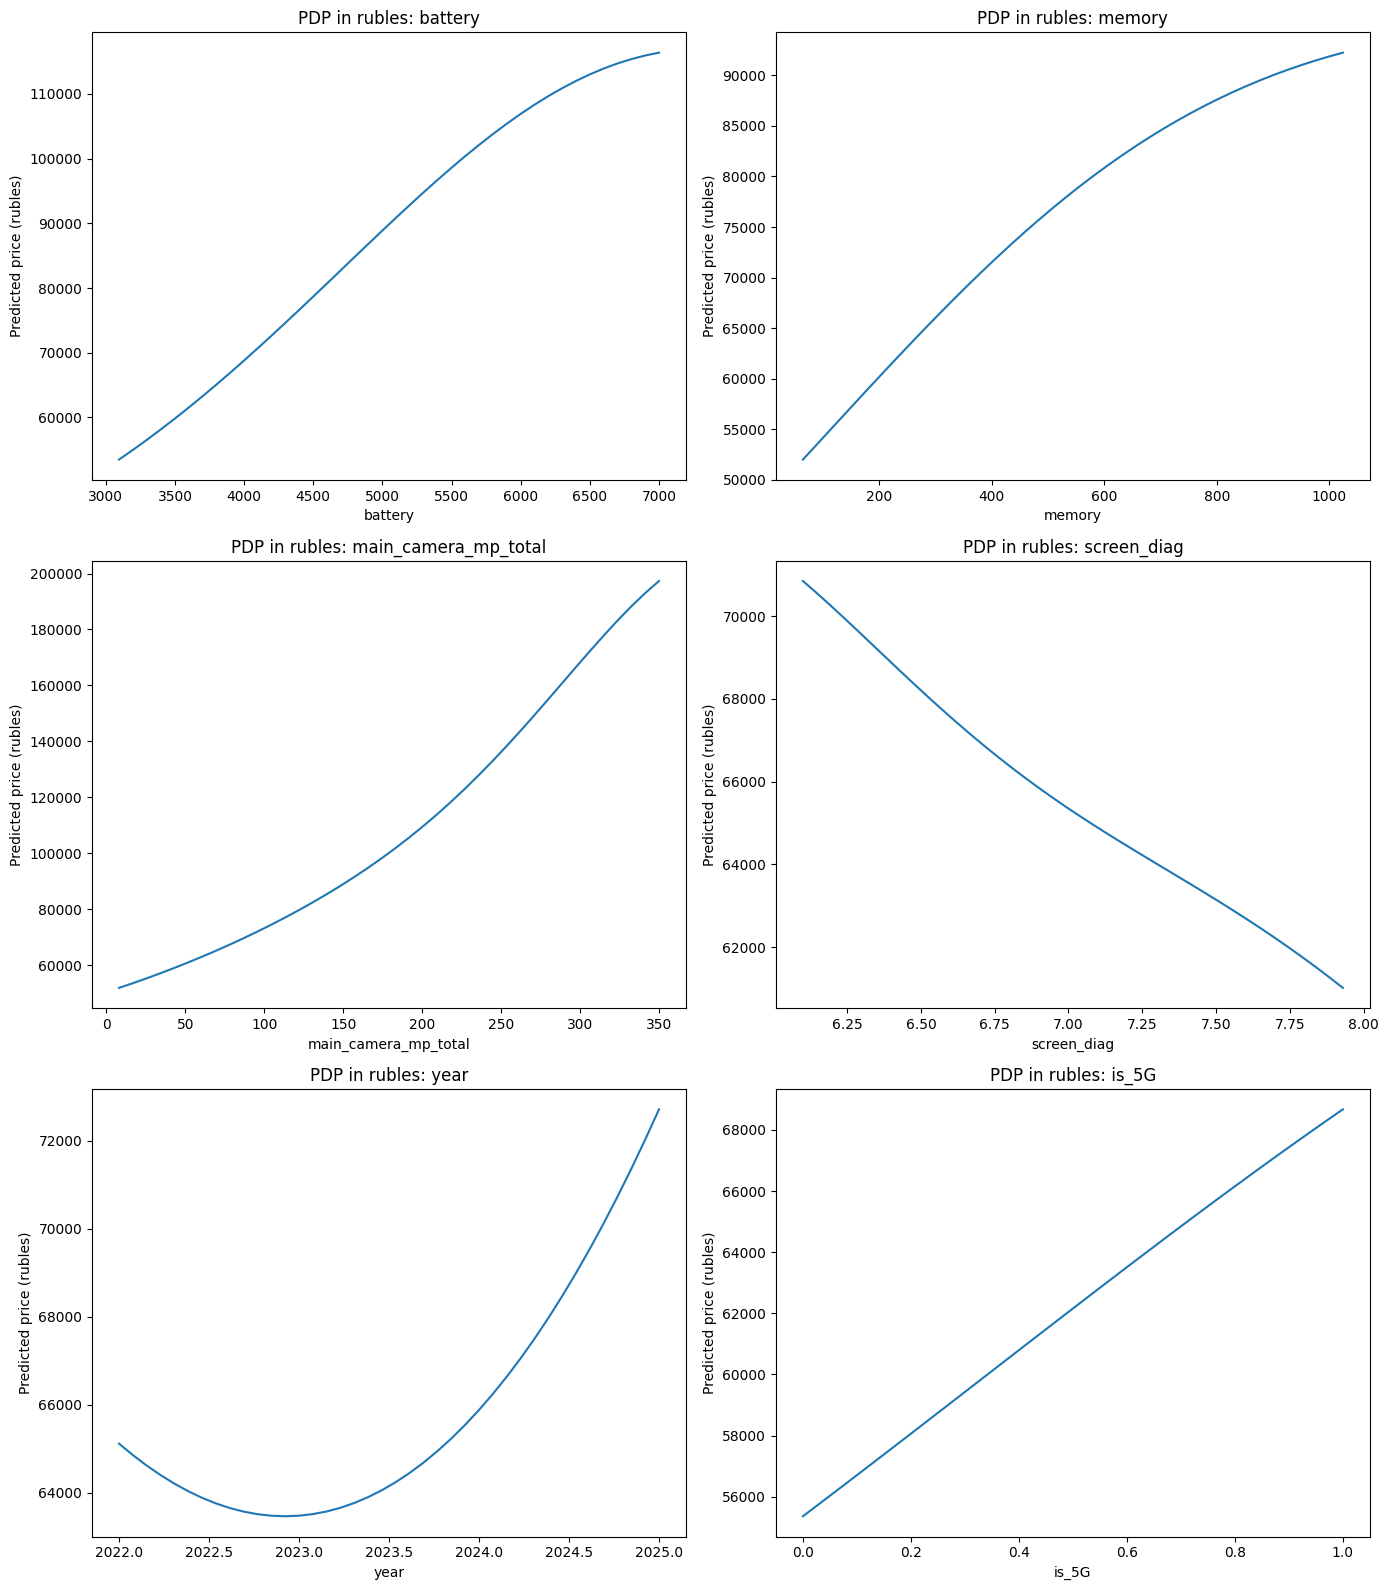

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def pdp_in_rubles(model, X_ref, feature, grid_points=40):
    X_tmp = X_ref.copy()
    grid = np.linspace(X_ref[feature].min(), X_ref[feature].max(), grid_points)

    preds = []
    for val in grid:
        X_tmp[feature] = val
        pred_log = model.predict(X_tmp)
        pred = np.expm1(pred_log)
        preds.append(pred.mean())

    return grid, np.array(preds)


features_for_pdp = ["battery", "memory", "main_camera_mp_total",
                    "screen_diag", "year", "is_5G"]

fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features_for_pdp):
    grid, preds = pdp_in_rubles(svr_best, X_test, feature)
    
    axes[i].plot(grid, preds)
    axes[i].set_title(f"PDP in rubles: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Predicted price (rubles)")
    
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

svr_model = svr_best.named_steps["svr"]
eps = svr_model.epsilon

# предсказания в лог-шкале
pred_train = svr_best.predict(X_train)
pred_test  = svr_best.predict(X_test)

abs_err_train = np.abs(y_train - pred_train)
abs_err_test  = np.abs(y_test  - pred_test)

print("SVR epsilon (log target):", eps)
print("Share within epsilon tube (train):", (abs_err_train <= eps).mean())
print("Share within epsilon tube (test): ", (abs_err_test <= eps).mean())

# доля support vectors
n_sv = len(svr_model.support_)
print("Support vectors:", n_sv, "out of", X_train.shape[0], "=> share:", n_sv / X_train.shape[0])

SVR epsilon (log target): 0.01
Share within epsilon tube (train): 0.42126514131897713
Share within epsilon tube (test):  0.3333333333333333
Support vectors: 549 out of 743 => share: 0.7388963660834454


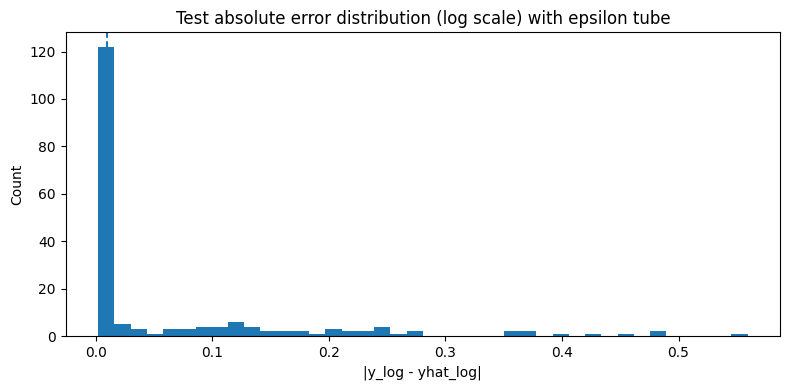

In [17]:
plt.figure(figsize=(8,4))
plt.hist(abs_err_test, bins=40)
plt.axvline(eps, linestyle="--")
plt.xlabel("|y_log - yhat_log|")
plt.ylabel("Count")
plt.title("Test absolute error distribution (log scale) with epsilon tube")
plt.tight_layout()
plt.show()

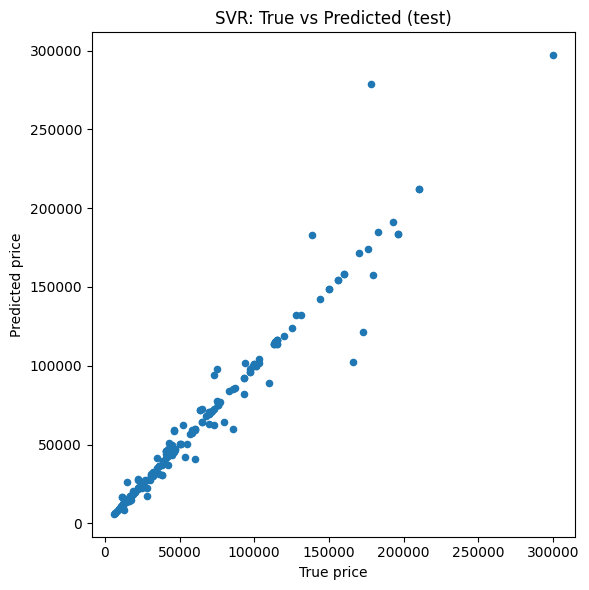

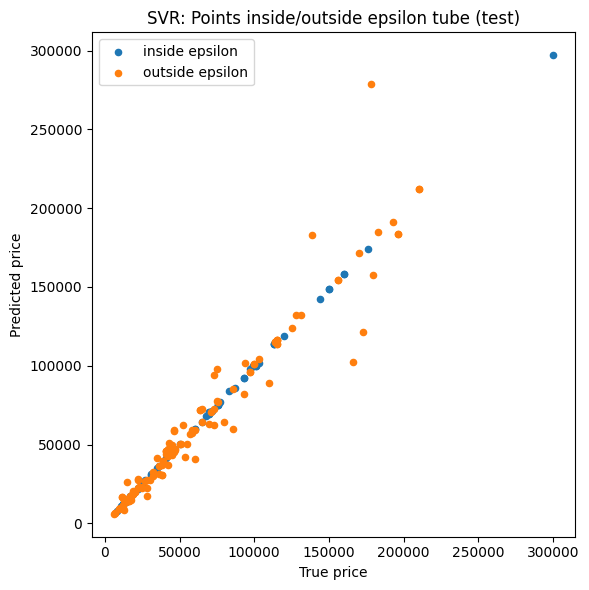

In [18]:
inside = abs_err_test <= eps

plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(pred_test), s=20)
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("SVR: True vs Predicted (test)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test[inside]), np.expm1(pred_test[inside]), s=20, label="inside epsilon")
plt.scatter(np.expm1(y_test[~inside]), np.expm1(pred_test[~inside]), s=20, label="outside epsilon")
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("SVR: Points inside/outside epsilon tube (test)")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np

def predict_price_rub(model, X_df):
    pred_log = model.predict(X_df)
    return np.expm1(pred_log)

def local_report(model, X_row, y_true_log=None, feature_steps=None):
    """
    X_row: pd.Series (одна строка признаков)
    y_true_log: float (если есть истинная цена в логах)
    feature_steps: dict, например {"battery": [ -500, 0, +500 ], "memory":[-64,0,+64]}
    """
    X0 = X_row.to_frame().T

    base_pred = float(predict_price_rub(model, X0)[0])
    report = {
        "base_pred_price": base_pred
    }
    if y_true_log is not None:
        report["true_price"] = float(np.expm1(y_true_log))
        report["abs_error"] = abs(report["true_price"] - base_pred)

    rows = []
    if feature_steps:
        for feat, steps in feature_steps.items():
            for step in steps:
                X1 = X0.copy()
                X1[feat] = X1[feat] + step
                pred1 = float(predict_price_rub(model, X1)[0])
                rows.append({
                    "feature": feat,
                    "step": step,
                    "new_value": float(X1[feat].iloc[0]),
                    "pred_price": pred1,
                    "delta_price": pred1 - base_pred
                })

    return report, pd.DataFrame(rows).sort_values(["feature","step"])

# пример использования:
# возьмем один объект из теста
idx = X_test.index[0]
X_row = X_test.loc[idx]
y_true_log = y_test.loc[idx]

report, whatif_df = local_report(
    svr_best,
    X_row,
    y_true_log=y_true_log,
    feature_steps={
        "battery": [-500, 0, 500],
        "memory": [-64, 0, 64],
        "main_camera_mp_total": [-12, 0, 12],
        "screen_diag": [-0.3, 0, 0.3],
        "year": [-1, 0, 1],
        "is_5G": [0, 1]  # тут лучше задать явно, см. ниже
    }
)

print(report)
display(whatif_df.head(30))

{'base_pred_price': 72583.92087749336, 'true_price': 64989.99999999999, 'abs_error': 7593.920877493372}


,feature,step,new_value,pred_price,delta_price
0,battery,-500.0,2727.0,51195.334706,-21388.586172
1,battery,0.0,3227.0,72583.920877,0.000000
2,battery,500.0,3727.0,101876.071486,29292.150609
15,is_5G,0.0,1.0,72583.920877,0.000000
16,is_5G,1.0,2.0,71687.904467,-896.016410
6,main_camera_mp_total,-12.0,12.0,67969.722136,-4614.198742
7,main_camera_mp_total,0.0,24.0,72583.920877,0.000000
8,main_camera_mp_total,12.0,36.0,77485.095385,4901.174508
3,memory,-64.0,64.0,61331.798349,-11252.122528
4,memory,0.0,128.0,72583.920877,0.000000


In [20]:
test_prices = np.expm1(y_test)
cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    rep, wf = local_report(
        svr_best,
        X_test.loc[idx],
        y_true_log=y_test.loc[idx],
        feature_steps={"battery":[-500,500], "memory":[-64,64], "year":[-1,1]}
    )
    print("INDEX:", idx, rep)
    display(wf.head(20))

INDEX: 66 {'base_pred_price': 6059.447036585137, 'true_price': 5998.999999999995, 'abs_error': 60.44703658514118}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,4500.0,4911.702779,-1147.744258
1,battery,500,5500.0,7606.219752,1546.772716
2,memory,-64,0.0,5034.143276,-1025.303761
3,memory,64,128.0,7201.486558,1142.039522
4,year,-1,2023.0,6524.737786,465.290750
5,year,1,2025.0,6270.699757,211.252720


INDEX: 239 {'base_pred_price': 50474.364242480704, 'true_price': 50999.00000000001, 'abs_error': 524.6357575193033}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,4700.0,46555.934026,-3918.430217
1,battery,500,5700.0,54145.402581,3671.038338
2,memory,-64,448.0,48970.143315,-1504.220928
3,memory,64,576.0,51657.326344,1182.962102
4,year,-1,2023.0,49607.222871,-867.141372
5,year,1,2025.0,52339.746326,1865.382084


INDEX: 478 {'base_pred_price': 297034.23074212344, 'true_price': 299998.9999999999, 'abs_error': 2964.76925787644}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,5100.0,282233.198975,-14801.031767
1,battery,500,6100.0,304892.872191,7858.641449
2,memory,-64,960.0,295920.734369,-1113.496373
3,memory,64,1088.0,296754.980108,-279.250634
4,year,-1,2024.0,313086.506175,16052.275433
5,year,1,2026.0,271778.274520,-25255.956222


CatBoost 

In [21]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cb_params = {
    "iterations": 5000,          # ставим больше, но остановит early stopping
    "learning_rate": 0.05,
    "depth": 5,
    "l2_leaf_reg": 10,
    "loss_function": "RMSE",
    "random_seed": 42,
    "verbose": False
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

fold_metrics = []
best_iters = []

for fold, (tr_idx, val_idx) in enumerate(cv.split(X_train)):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]   # log1p
    
    model = CatBoostRegressor(**cb_params)
    model.fit(
        X_tr, y_tr,
        eval_set=(X_val, y_val),
        early_stopping_rounds=200,
        use_best_model=True
    )
    
    pred_val_log = model.predict(X_val)
    y_true = np.expm1(y_val)
    y_pred = np.expm1(pred_val_log)

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    
    fold_metrics.append([rmse, mae, r2])
    best_iters.append(model.get_best_iteration())
    
    print(f"Fold {fold:02d}: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f} | best_iter={best_iters[-1]}")

fold_metrics = np.array(fold_metrics)

print("\nCV mean ± std:")
print(f"RMSE: {fold_metrics[:,0].mean():,.0f} ± {fold_metrics[:,0].std():,.0f}")
print(f"MAE : {fold_metrics[:,1].mean():,.0f} ± {fold_metrics[:,1].std():,.0f}")
print(f"R2  : {fold_metrics[:,2].mean():.4f} ± {fold_metrics[:,2].std():.4f}")

print("\nBest iteration: mean ± std =", np.mean(best_iters), "±", np.std(best_iters))

Fold 00: RMSE=20,234 | MAE=5,989 | R2=0.8653 | best_iter=1736
Fold 01: RMSE=21,100 | MAE=5,680 | R2=0.8250 | best_iter=3805
Fold 02: RMSE=17,970 | MAE=6,751 | R2=0.8623 | best_iter=882
Fold 03: RMSE=7,951 | MAE=3,241 | R2=0.9736 | best_iter=4985
Fold 04: RMSE=8,553 | MAE=3,972 | R2=0.9723 | best_iter=2124
Fold 05: RMSE=19,514 | MAE=5,124 | R2=0.8529 | best_iter=2168
Fold 06: RMSE=7,919 | MAE=3,349 | R2=0.9719 | best_iter=4986
Fold 07: RMSE=10,644 | MAE=4,620 | R2=0.9542 | best_iter=2789
Fold 08: RMSE=11,368 | MAE=4,454 | R2=0.9494 | best_iter=1182
Fold 09: RMSE=19,373 | MAE=5,802 | R2=0.8788 | best_iter=1074
Fold 10: RMSE=7,758 | MAE=3,677 | R2=0.9765 | best_iter=2025
Fold 11: RMSE=20,261 | MAE=5,486 | R2=0.8415 | best_iter=1397
Fold 12: RMSE=21,415 | MAE=6,296 | R2=0.8316 | best_iter=1535
Fold 13: RMSE=7,060 | MAE=3,165 | R2=0.9801 | best_iter=4999
Fold 14: RMSE=10,758 | MAE=5,150 | R2=0.9554 | best_iter=1049

CV mean ± std:
RMSE: 14,125 ± 5,641
MAE : 4,850 ± 1,131
R2  : 0.9127 ± 0.05

In [23]:
best_iter = int(np.mean(best_iters))

final_cb = CatBoostRegressor(
    iterations=best_iter,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=10,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

final_cb.fit(X_train, y_train)   # ← без eval_set

CatBoostRegressor(depth=5, iterations=2449, l2_leaf_reg=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose=False)

In [24]:
pred_test_log = final_cb.predict(X_test)

y_true = np.expm1(y_test)
y_pred = np.expm1(pred_test_log)

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"CatBoost TEST: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

CatBoost TEST: RMSE=8,304 | MAE=3,635 | R2=0.9753


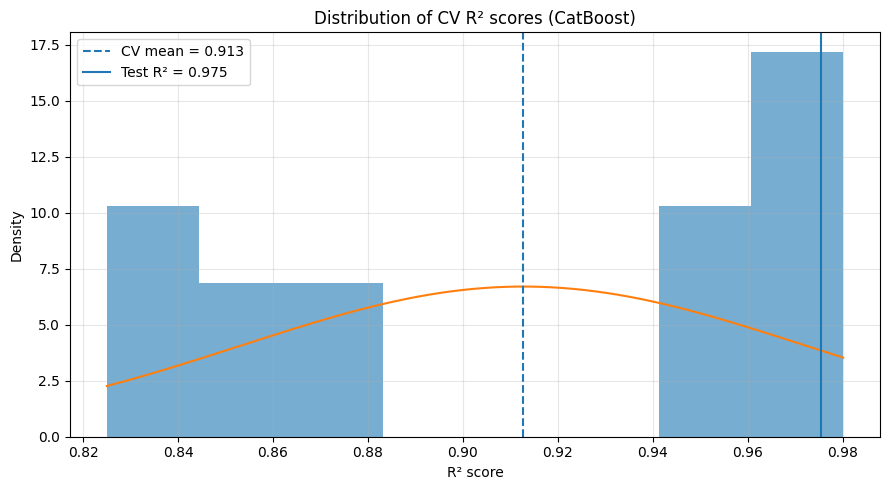

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

r2_scores = fold_metrics[:, 2]

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

plt.figure(figsize=(9, 5))

# Гистограмма с нормированной плотностью
plt.hist(r2_scores, bins=8, density=True, alpha=0.6)

# Нормальная кривая по mean/std
x = np.linspace(r2_scores.min(), r2_scores.max(), 200)
plt.plot(x, norm.pdf(x, mean_r2, std_r2))

# Линии среднего CV и test
plt.axvline(mean_r2, linestyle="--", label=f"CV mean = {mean_r2:.3f}")
plt.axvline(r2, linestyle="-", label=f"Test R² = {r2:.3f}")

plt.xlabel("R² score")
plt.ylabel("Density")
plt.title("Distribution of CV R² scores (CatBoost)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

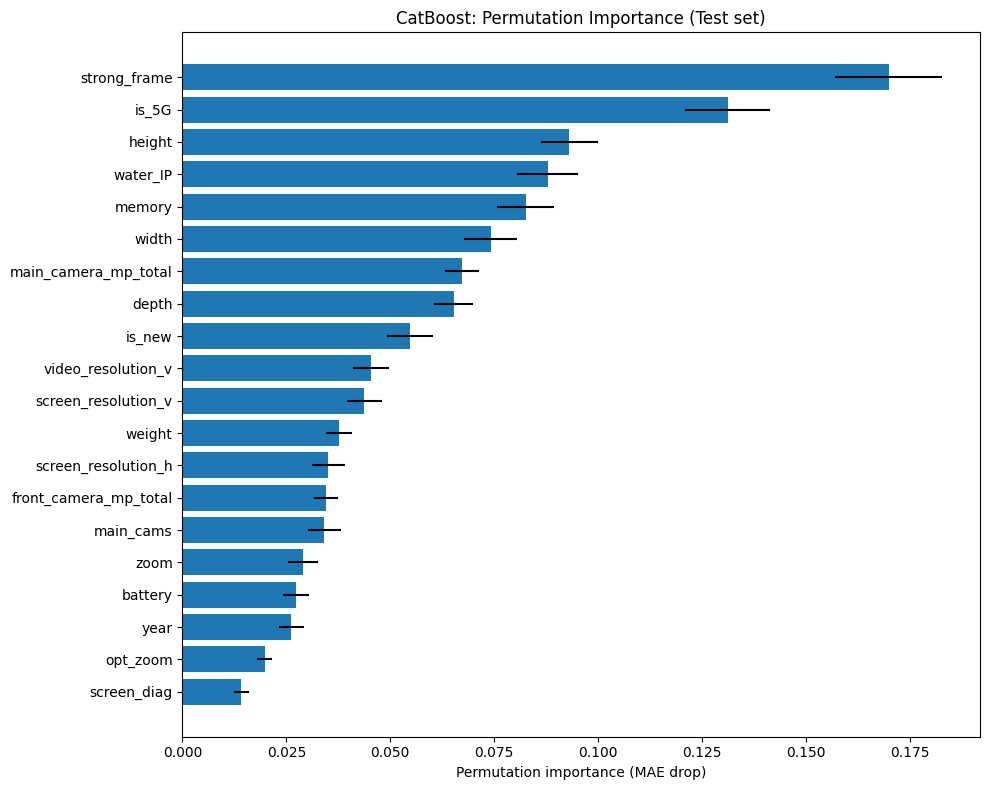

,feature,importance_mean,importance_std
29,strong_frame,0.169932,0.012835
16,is_5G,0.131148,0.010258
2,height,0.093086,0.006786
11,water_IP,0.087861,0.007408
1,memory,0.082597,0.006898
3,width,0.074137,0.006456
21,main_camera_mp_total,0.067233,0.004161
4,depth,0.065315,0.004701
14,is_new,0.054702,0.005483
5,video_resolution_v,0.045363,0.004283


In [26]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

perm = permutation_importance(
    final_cb,
    X_test,
    y_test,   # лог-шкала (как обучали)
    scoring="neg_mean_absolute_error",
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

imp_df_cb = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

# Красивый график
top_k = 20
plot_df = imp_df_cb.head(top_k).iloc[::-1]

plt.figure(figsize=(10, 8))
plt.barh(plot_df["feature"], plot_df["importance_mean"],
         xerr=plot_df["importance_std"])
plt.xlabel("Permutation importance (MAE drop)")
plt.title("CatBoost: Permutation Importance (Test set)")
plt.tight_layout()
plt.show()

imp_df_cb.head(15)

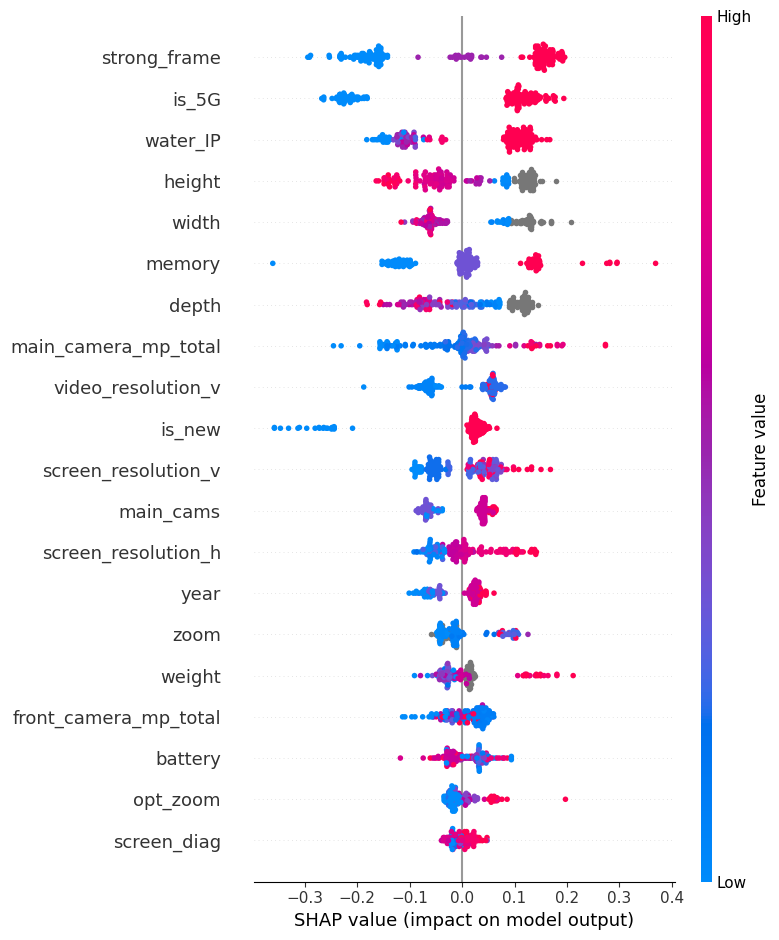

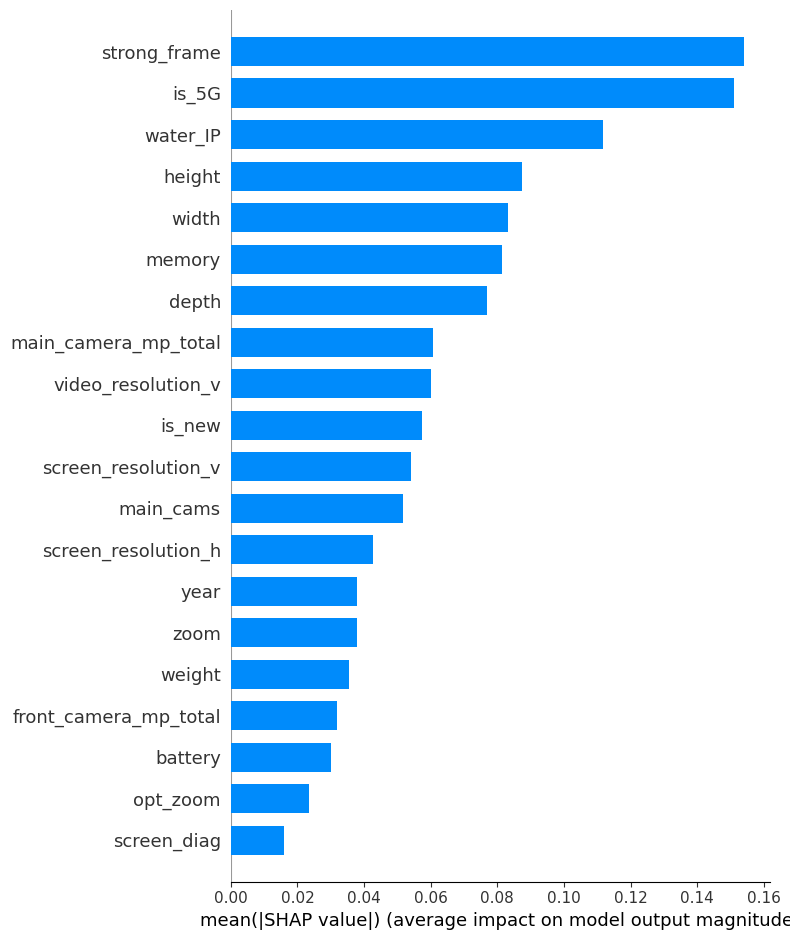

In [27]:
import shap

explainer = shap.TreeExplainer(final_cb)
shap_values = explainer.shap_values(X_test)

# Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test)

# Bar importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

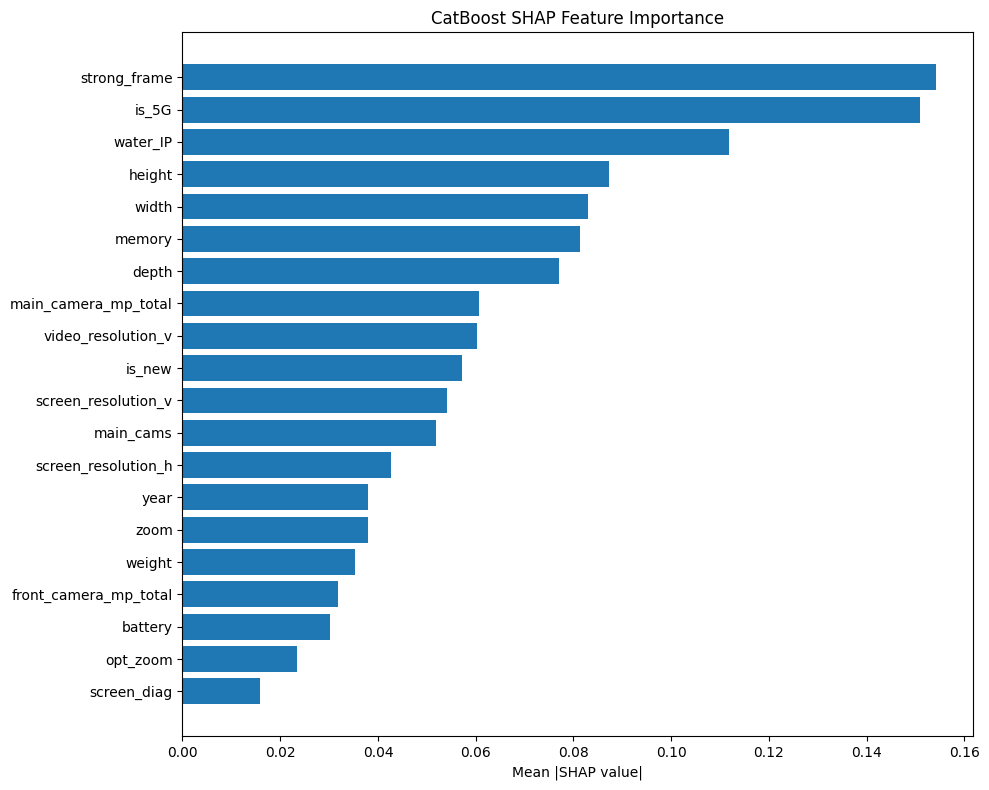

,feature,mean_abs_shap
29,strong_frame,0.154104
16,is_5G,0.150970
11,water_IP,0.111756
2,height,0.087349
3,width,0.083068
1,memory,0.081395
4,depth,0.076948
21,main_camera_mp_total,0.060662
5,video_resolution_v,0.060174
14,is_new,0.057262


In [28]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(final_cb)
shap_values = explainer.shap_values(X_test)

# Mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

plt.figure(figsize=(10,8))
plt.barh(shap_df["feature"].head(20)[::-1],
         shap_df["mean_abs_shap"].head(20)[::-1])
plt.title("CatBoost SHAP Feature Importance")
plt.xlabel("Mean |SHAP value|")
plt.tight_layout()
plt.show()

shap_df.head(15)


INDEX: 66


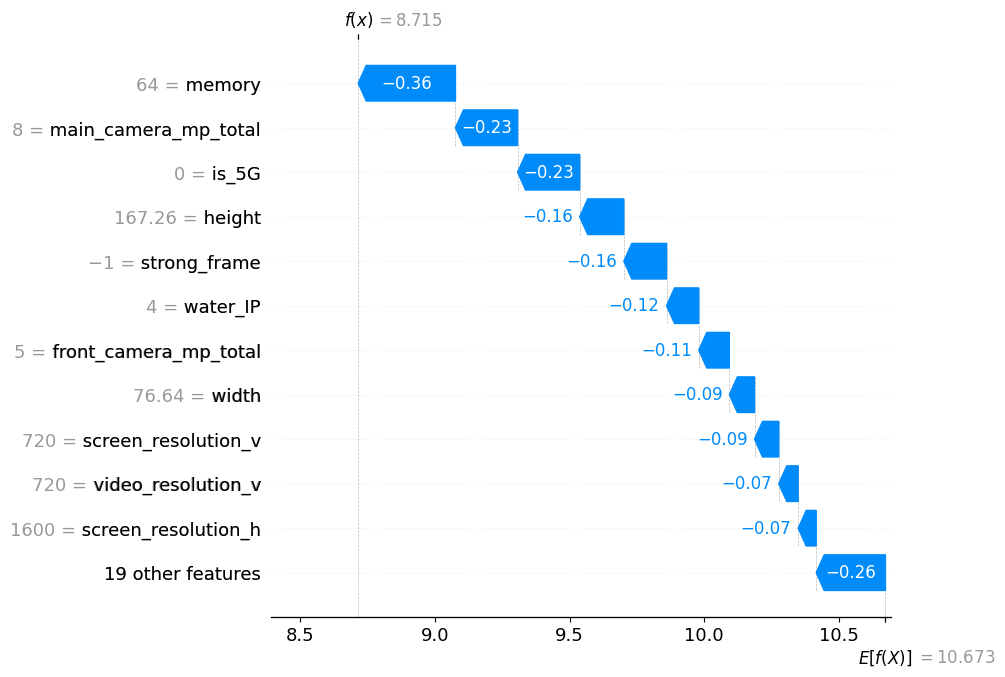


INDEX: 239


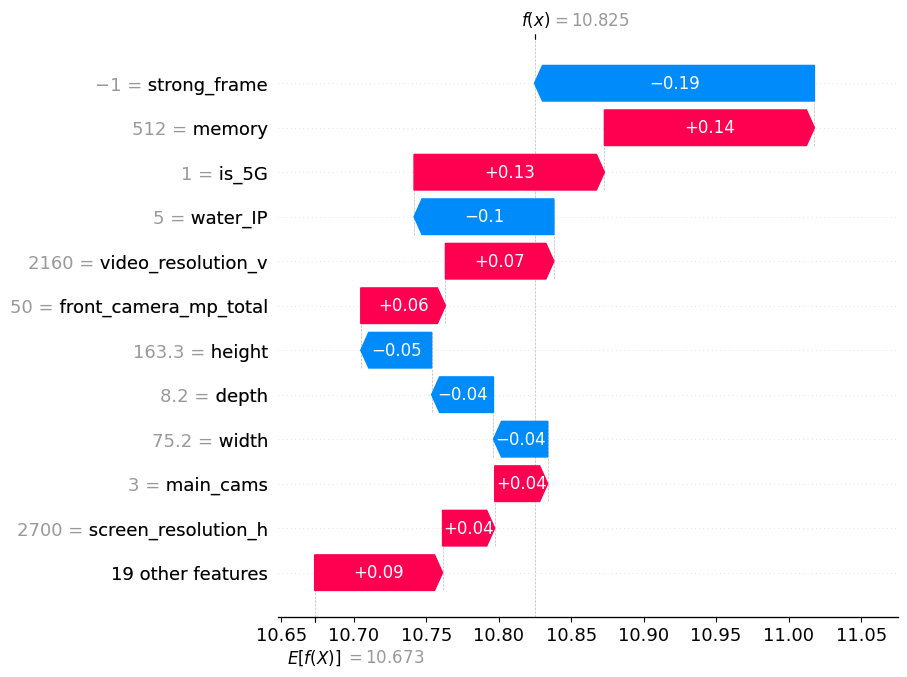


INDEX: 478


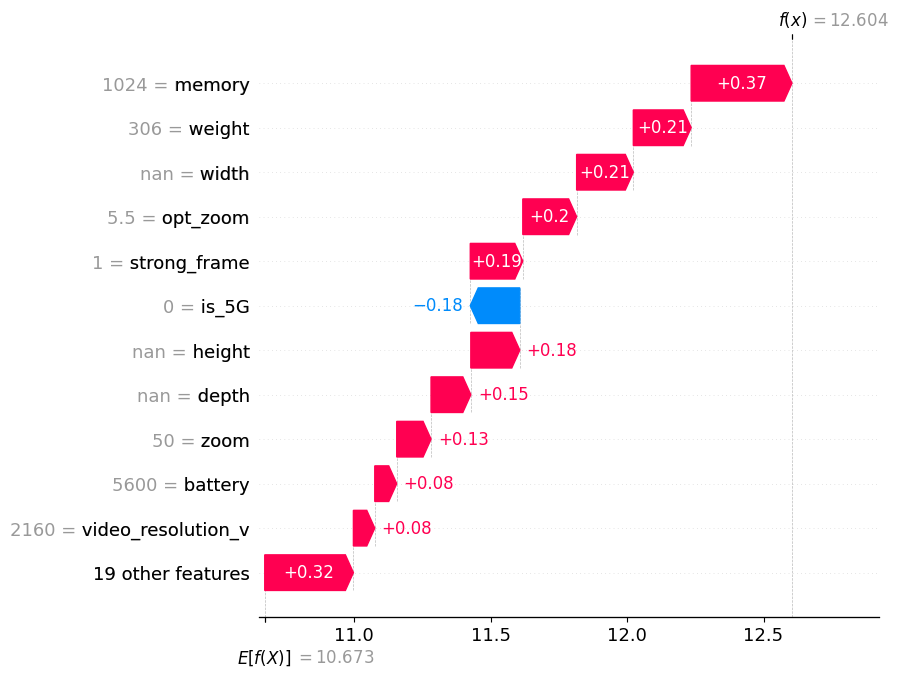

In [29]:
import numpy as np

test_prices = np.expm1(y_test)

cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    print("\nINDEX:", idx)
    
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values[X_test.index.get_loc(idx)],
            base_values=explainer.expected_value,
            data=X_test.loc[idx],
            feature_names=X_test.columns
        ),
        max_display=12   # показываем только топ-12 факторов
    )

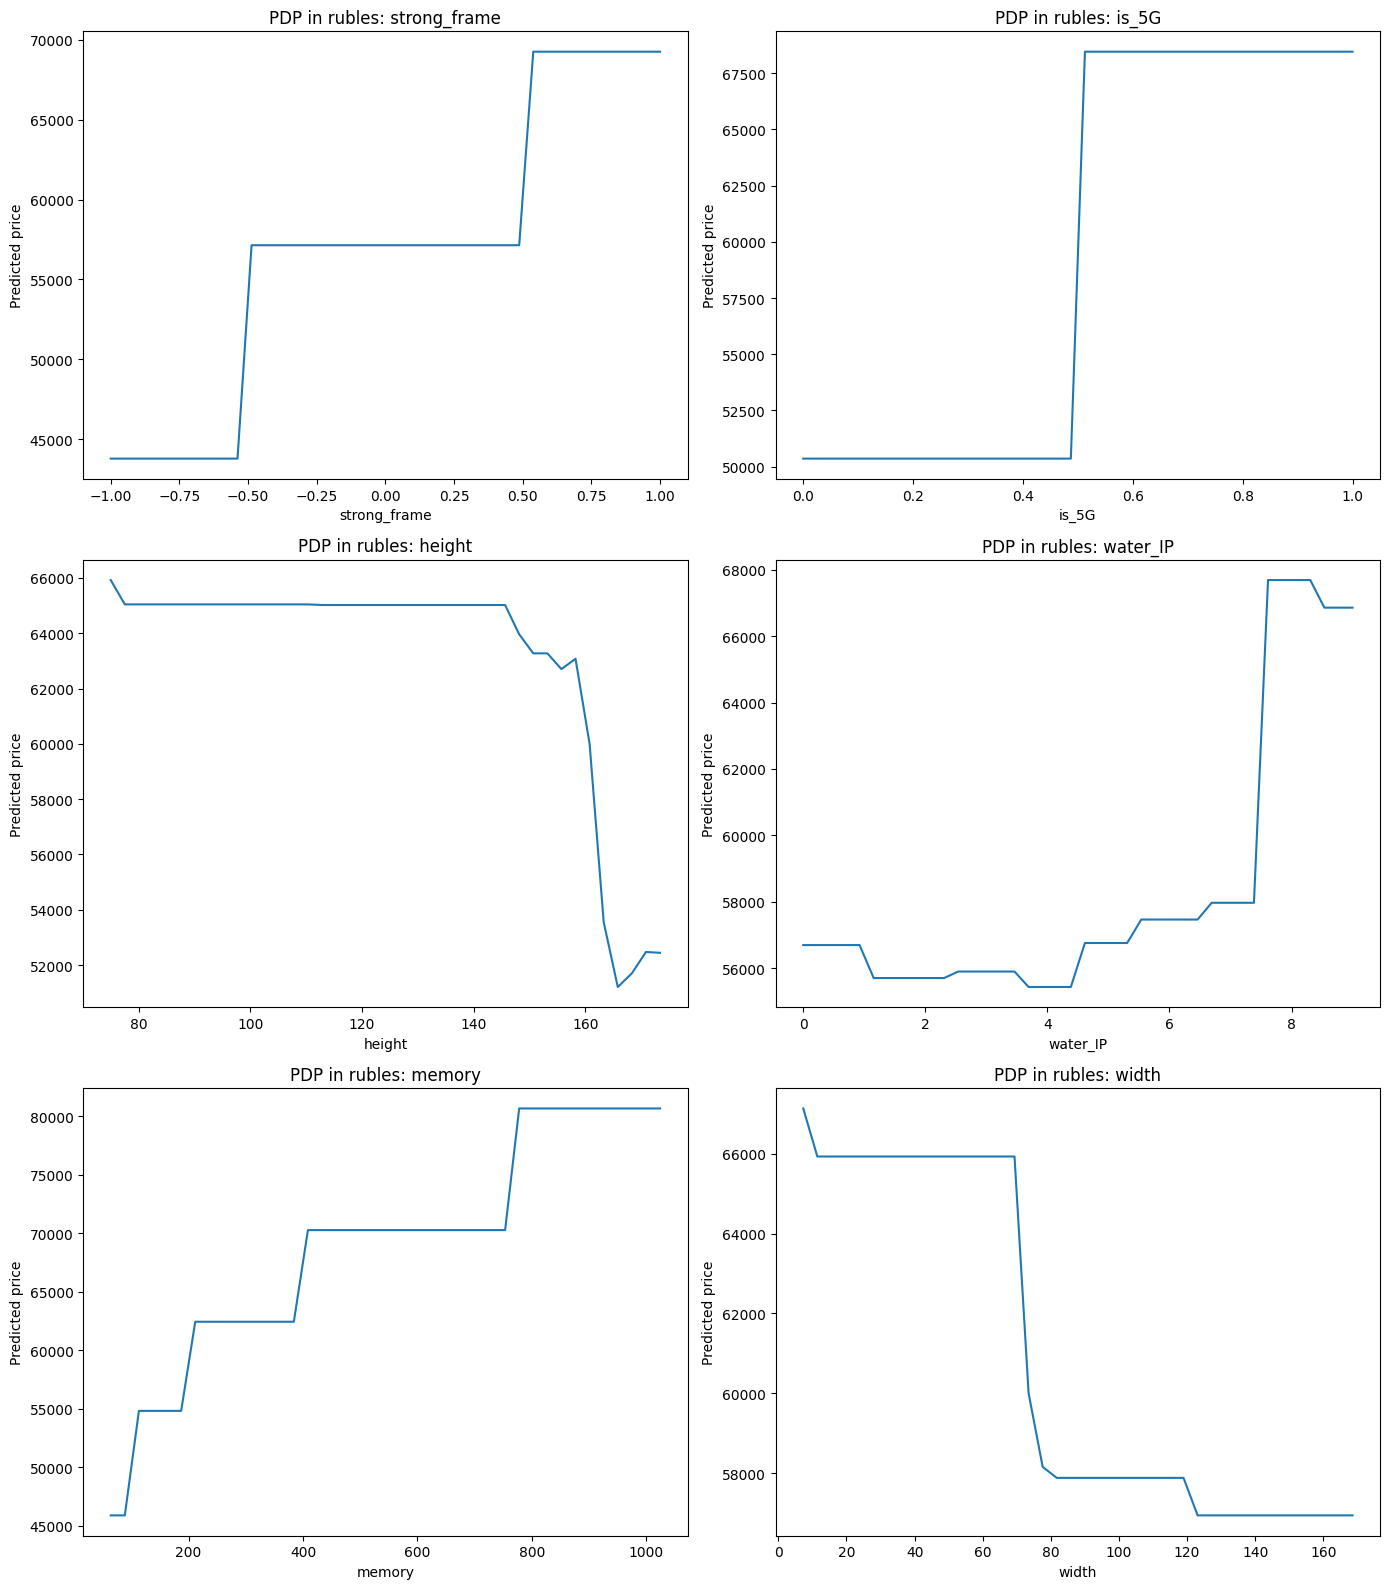

In [30]:
def pdp_in_rubles(model, X_ref, feature, grid_points=40):
    X_tmp = X_ref.copy()
    grid = np.linspace(X_ref[feature].min(), X_ref[feature].max(), grid_points)

    preds = []
    for val in grid:
        X_tmp[feature] = val
        pred_log = model.predict(X_tmp)
        pred = np.expm1(pred_log)
        preds.append(pred.mean())

    return grid, np.array(preds)

features_for_pdp = imp_df_cb.head(6)["feature"].tolist()

fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features_for_pdp):
    grid, preds = pdp_in_rubles(final_cb, X_test, feature)
    
    axes[i].plot(grid, preds)
    axes[i].set_title(f"PDP in rubles: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Predicted price")

plt.tight_layout()
plt.show()

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

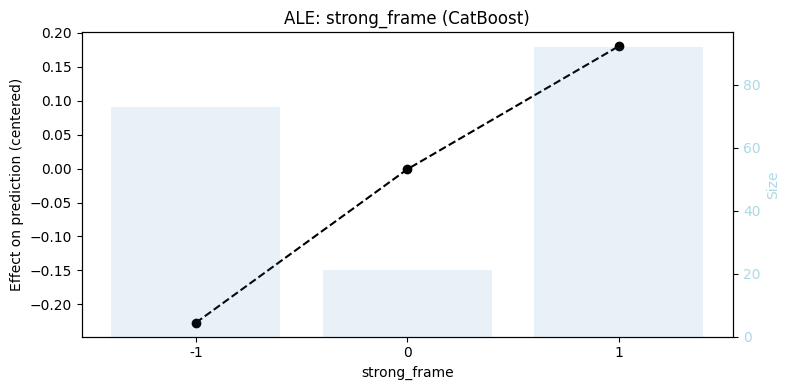

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

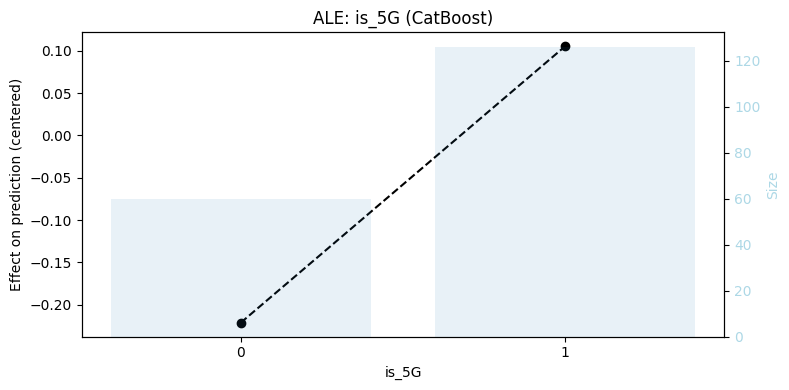

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

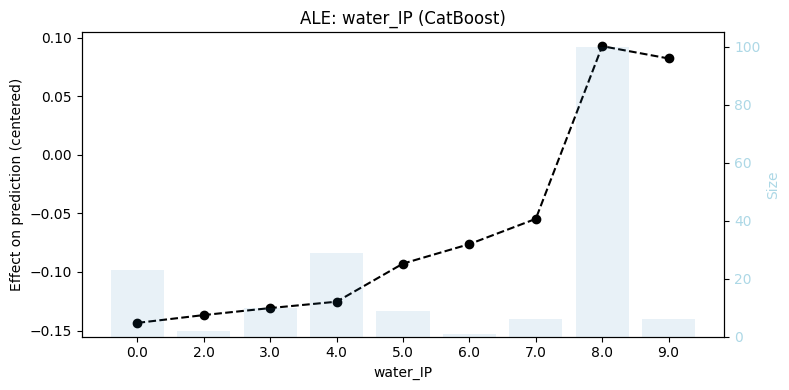

PyALE._ALE_generic:INFO: Continuous feature detected.


ValueError: bins must increase monotonically.

<Figure size 700x400 with 0 Axes>

In [32]:
from PyALE import ale
import matplotlib.pyplot as plt

features_for_ale = shap_df.head(5)["feature"].tolist()

for feat in features_for_ale:
    plt.figure(figsize=(7,4))
    ale_eff = ale(
        X=X_test,
        model=final_cb,
        feature=[feat],
        grid_size=40,
        include_CI=False
    )
    plt.title(f"ALE: {feat} (CatBoost)")
    plt.tight_layout()
    plt.show()

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from pyALE import ale
except ImportError:
    from PyALE import ale


def ale_safe(model, X, feature, grid_size=40, feature_type=None, include_CI=False):
    # 1) Убираем строки, где именно этот признак NaN/inf
    mask = X[feature].notna() & np.isfinite(X[feature].astype(float))
    X_sub = X.loc[mask].copy()

    # 2) Для бинарных/мало-уникальных признаков делаем discrete + маленький grid
    nunique = X_sub[feature].nunique(dropna=True)

    if feature_type is None:
        if nunique <= 10:
            feature_type = "discrete"
        else:
            feature_type = "continuous"

    if feature_type == "discrete":
        grid_size = min(grid_size, max(nunique, 2))

    plt.figure(figsize=(8, 4))
    res = ale(
        X=X_sub,
        model=model,
        feature=[feature],
        feature_type=feature_type,
        grid_size=grid_size,
        include_CI=include_CI
    )
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.title(f"ALE: {feature} ({feature_type}) | n={len(X_sub)}")
    plt.xlabel(feature)
    plt.ylabel("Effect on log1p(price)")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    return res

<Figure size 800x400 with 0 Axes>

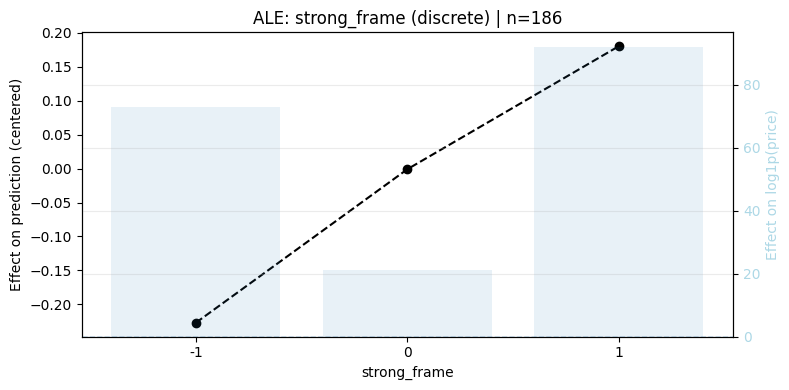

<Figure size 800x400 with 0 Axes>

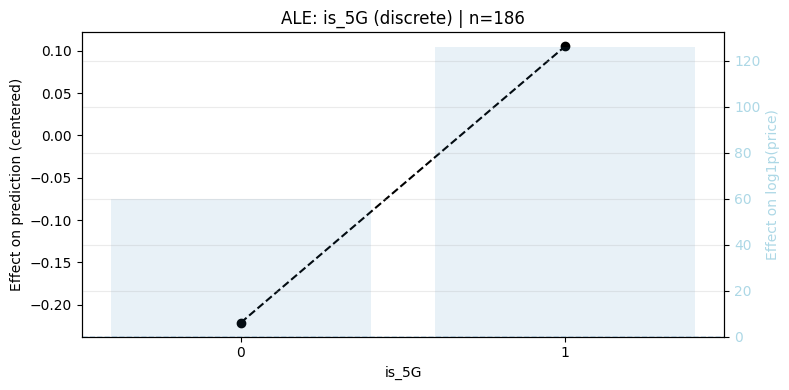

<Figure size 800x400 with 0 Axes>

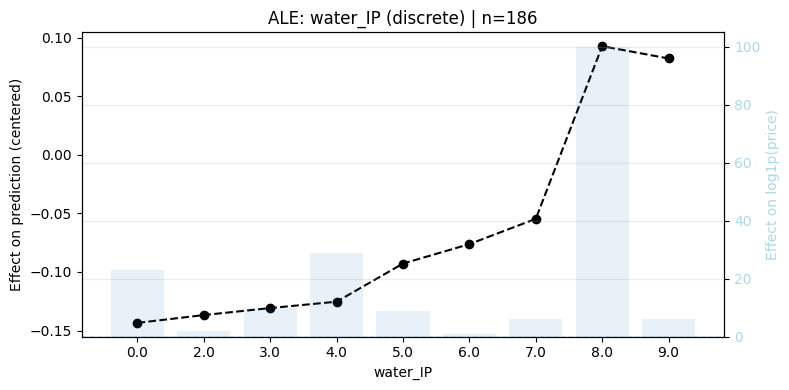

<Figure size 800x400 with 0 Axes>

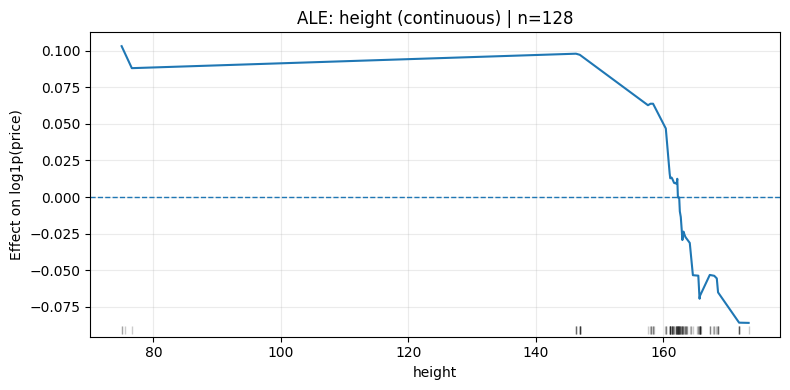

<Figure size 800x400 with 0 Axes>

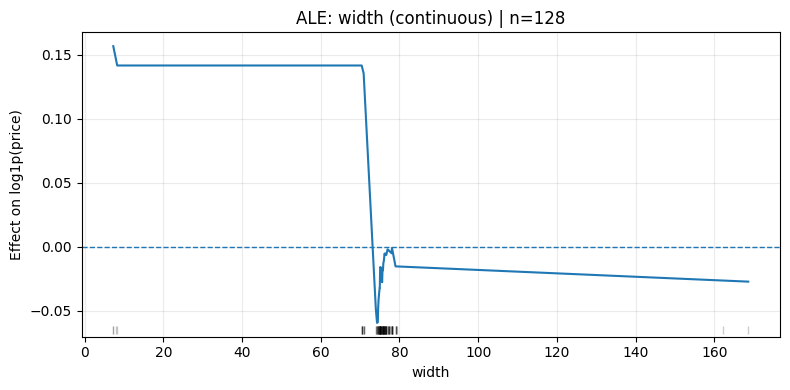

In [34]:
features_for_ale = shap_df.head(5)["feature"].tolist()

for feat in features_for_ale:
    ale_safe(final_cb, X_test, feat, grid_size=40, include_CI=False)

<Figure size 800x400 with 0 Axes>

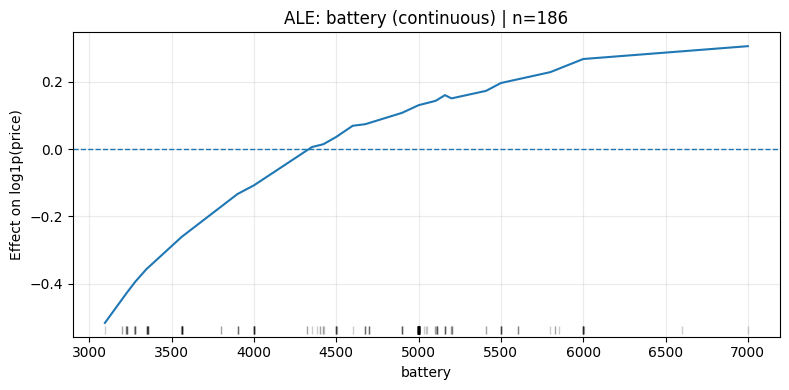

<Figure size 800x400 with 0 Axes>

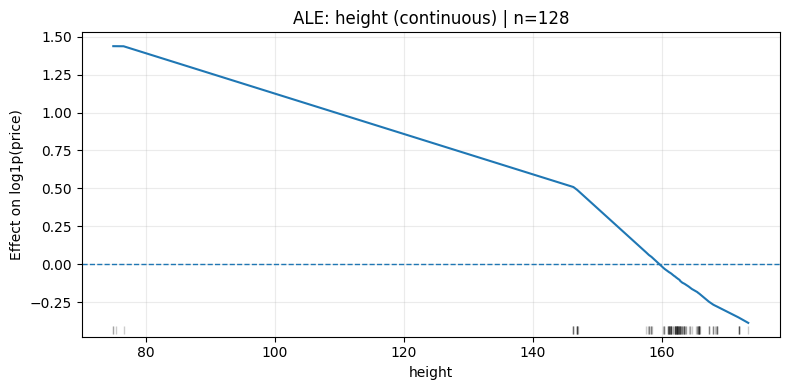

<Figure size 800x400 with 0 Axes>

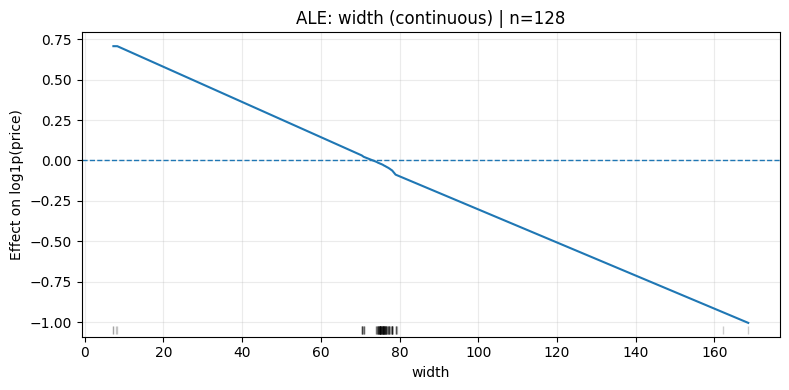

<Figure size 800x400 with 0 Axes>

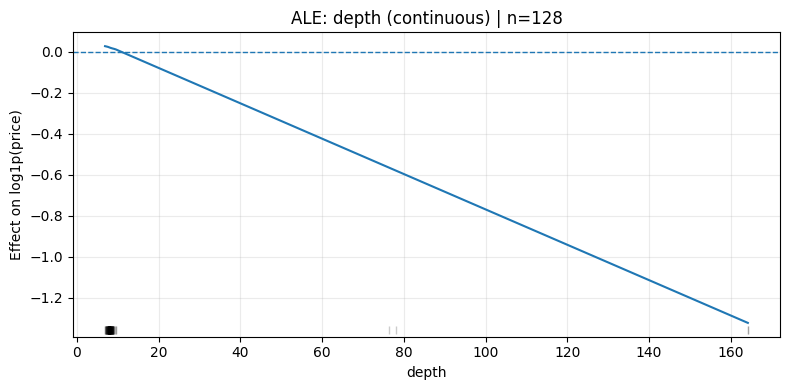

<Figure size 800x400 with 0 Axes>

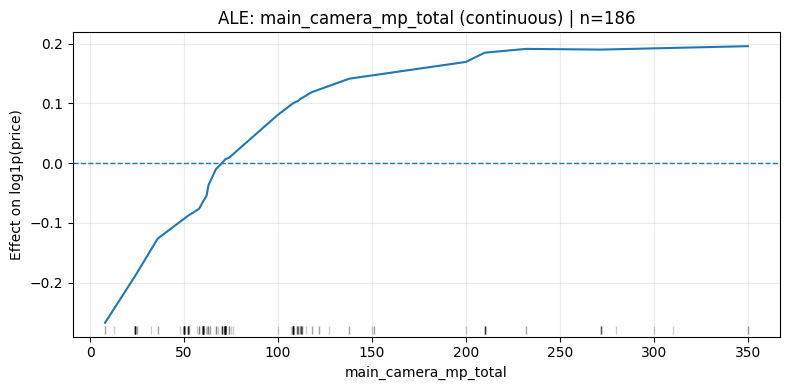

In [35]:
features_for_ale_svr = imp_df.head(5)["feature"].tolist()

for feat in features_for_ale_svr:
    ale_safe(svr_best, X_test, feat, grid_size=40, include_CI=False)